In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_csv('placement.csv')

In [ ]:
# all colomn is printed which is in data set
df

# Checking Linearity way graph

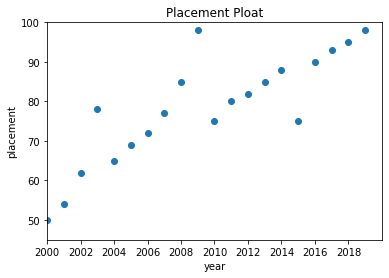

In [10]:
plt.scatter(df['year'],df['Placement percentage'])
plt.title("Placement Ploat")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.xlabel("year")
plt.ylabel("placement")
plt.show()

In [16]:
X= df[['year']]
Y=df[['Placement percentage']]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train=x_train['year'].to_numpy()
x_test=x_test['year'].to_numpy()
y_train=y_train['Placement percentage'].to_numpy()
y_test=y_test['Placement percentage'].to_numpy()

print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))


print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)


Train - Predictors shape (16,)
Test - Predictors shape (4,)
Train - Target shape (16,)
Test - Target shape (4,)
Train - Predictors shape (16, 1)
Test - Predictors shape (4, 1)
Train - Target shape (16, 1)
Test - Target shape (4, 1)


# Linear Regression using normal equaltions

In [21]:
def theta_calc(x_train, y_train): # calculate co-efficient
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    
    return theta

In [22]:
def predict_func(slope,intercept,x_test):
    #
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):

        #pred.append((slope * x_test.iloc[i]['TV']) + intercept)
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [23]:
def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [24]:
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #ssr = np.sum((prediction-y_avg)**2)
    #r2= (ssr/tot_err)
    r2 = 1 - (res_err / tot_err)
    return r2

In [25]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)

Intercept of the model [-3374.38063633]
Slope of the model [1.71934851]


In [27]:
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)

#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

R squared value 0.5156402694637567


In [28]:
#MSE calculation
pred_df = pd.DataFrame(prediction)
pred_df.columns=['placement']
error =  mse_calc(prediction, y_test)
error =  mse_calc(prediction, y_test)

print('Mean squared error of the model', error)

Mean squared error of the model 144.5813795650686


In [31]:
len(prediction)
type(prediction)
type(y_test)
#y_test.head()

pred_df.head()
#y_test.head()
error =  mse_calc(pred_df, y_test)
print('Mean squared error of the model:-', error)

r2_val = rsq(pred_df, y_test)
print('R squared value:-', r2_val)

Mean squared error of the model:- placement    144.58138
dtype: float64
R squared value:- placement    0.51564
dtype: float64
